<div style="display: flex; background-color: RGB(100,149,237);" >
<h1 style="margin: auto; padding: 30px; ">Mission 1 </h1>
</div>

<div style="display: flex; background-color: RGB(100,149,237);" >
<h3 style="margin: auto; padding: 30px; ">Imporation des librairies</h3>
</div>

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<div style="display: flex; background-color: RGB(100,149,237);" >
<h3 style="margin: auto; padding: 30px; ">Imporation des données</h3>
</div>

In [60]:
customers = pd.read_csv("data/olist_customers_dataset.csv")
geolocation = pd.read_csv("data/olist_geolocation_dataset.csv")
items = pd.read_csv("data/olist_order_items_dataset.csv")
payments = pd.read_csv("data/olist_order_payments_dataset.csv")
reviews = pd.read_csv("data/olist_order_reviews_dataset.csv")
orders = pd.read_csv("data/olist_orders_dataset.csv")
products = pd.read_csv("data/olist_products_dataset.csv")
sellers = pd.read_csv("data/olist_sellers_dataset.csv")
translate = pd.read_csv("data/product_category_name_translation.csv")

<div style="display: flex; background-color: RGB(100,149,237);" >
<h3 style="margin: auto; padding: 30px; "> Traduction des produits </h3>
</div>

In [61]:
translate.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [62]:
translate_mapper = dict(zip(translate.product_category_name, translate.product_category_name_english))

In [63]:
products['product_category_name'] = products.product_category_name.map(translate_mapper)

In [64]:
products.product_category_name.head()

0         perfumery
1               art
2    sports_leisure
3              baby
4        housewares
Name: product_category_name, dtype: object

<div style="display: flex; background-color: RGB(100,149,237);" >
<h3 style="margin: auto; padding: 30px; ">Création de la Dataframe initiale</h3>
</div>

In [84]:
df = pd.merge(customers, orders, on = "customer_id", how = "inner")
df = pd.merge(pd.merge(df, items, on = "order_id", how='inner'), products, on = "product_id", how="inner")
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,124.99,21.88,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,112.99,24.90,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,112.99,24.90,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,...,124.99,15.62,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,...,106.99,30.59,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0


<div style="display: flex; background-color: RGB(100,149,237);" >
<h3 style="margin: auto; padding: 30px; ">Recency</h3>
</div>

**Nous allons créer une colonne qui va nous permettre de savoir combien de jour s'est écouler entre la dernière commande d'un client par rapport à la dernière commande du dernier client.**

In [88]:
date_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

for col in date_columns:
    df[col] = pd.to_datetime(df[col], format='%Y-%m-%d %H:%M:%S')

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    112650 non-null  object        
 1   customer_unique_id             112650 non-null  object        
 2   customer_zip_code_prefix       112650 non-null  int64         
 3   customer_city                  112650 non-null  object        
 4   customer_state                 112650 non-null  object        
 5   order_id                       112650 non-null  object        
 6   order_status                   112650 non-null  object        
 7   order_purchase_timestamp       112650 non-null  datetime64[ns]
 8   order_approved_at              112635 non-null  datetime64[ns]
 9   order_delivered_carrier_date   111456 non-null  datetime64[ns]
 10  order_delivered_customer_date  110196 non-null  datetime64[ns]
 11  

In [91]:
df.describe(include="all")

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_10628\1985922364.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include="all")
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_10628\1985922364.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include="all")
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_10628\1985922364.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the fut

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,112650,112650,112650.000000,112650,112650,112650,112650,112650,112635,111456,...,112650.000000,112650.000000,111023,111047.000000,111047.000000,111047.000000,112632.000000,112632.000000,112632.000000,112632.000000
unique,98666,95420,NaN,4110,27,98666,7,98112,90174,81017,...,NaN,NaN,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,fc3d1daec319d62d49bfb5e1f83123e9,c8460e4251689ba205045f3ea17884a1,NaN,sao paulo,SP,8272b63d03f5f79c56e9e4120aec44ef,delivered,2017-07-16 18:19:25,2018-02-24 03:20:27,2018-05-09 15:48:00,...,NaN,NaN,bed_bath_table,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,21,24,NaN,17808,47449,21,110197,21,23,48,...,NaN,NaN,11115,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09-03 09:06:57,2018-09-03 17:40:06,2018-09-11 19:48:28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,35119.309090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,120.653739,19.990320,NaN,48.775978,787.867029,2.209713,2093.672047,30.153669,16.593766,22.996546
std,NaN,NaN,29866.120801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,183.633928,15.806405,NaN,10.025581,652.135608,1.721438,3751.596884,16.153449,13.443483,11.707268
min,NaN,NaN,1003.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.850000,0.000000,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,11310.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39.900000,13.080000,NaN,42.000000,348.000000,1.000000,300.000000,18.000000,8.000000,15.000000


In [92]:
df_max_purchase = df.groupby('customer_unique_id').order_purchase_timestamp.max().reset_index()
df_max_purchase.columns = ['customer_unique_id', 'MaxPurchaseDate']

df_max_purchase.head()

,customer_unique_id,MaxPurchaseDate
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42


In [93]:
df_max_purchase['Recency'] = (df_max_purchase['MaxPurchaseDate'].max() - df_max_purchase['MaxPurchaseDate']).dt.days

In [94]:
df_max_purchase

,customer_unique_id,MaxPurchaseDate,Recency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,115
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,118
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,541
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,325
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,292
...,...,...,...
95415,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,451
95416,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,266
95417,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,572
95418,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,123


In [95]:
df_max_purchase['Recency'].describe()

count    95420.000000
mean       242.600377
std        153.160320
min          0.000000
25%        118.000000
50%        223.000000
75%        352.000000
max        728.000000
Name: Recency, dtype: float64

Sur nos 95420 clients différents : 

    -En moyenne leurs dernières commandes était il y a 243 jour
    -Au plus tard il y a 728 jours
    -Et la médianne se trouve à 223 jours

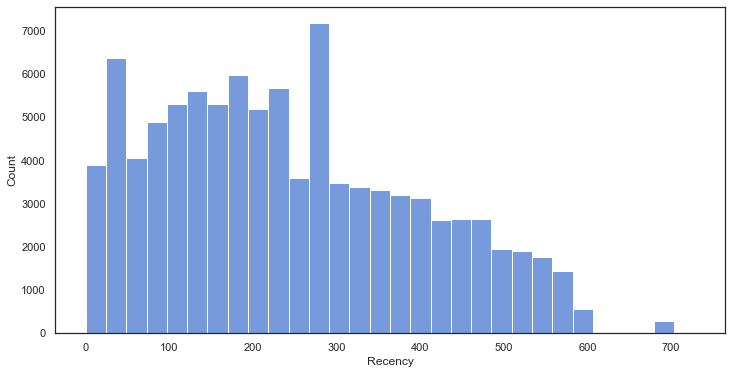

In [96]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(df_max_purchase['Recency'], bins=30)
plt.show()

<div style="display: flex; background-color: RGB(100,149,237);" >
<h3 style="margin: auto; padding: 30px; ">Nombre de produit et type de produit</h3>
</div>

**Nous allons maintenant voir le nombre de produit et le type de produit que commande un client.**

In [97]:
df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,124.99,21.88,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,112.99,24.90,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,112.99,24.90,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,...,124.99,15.62,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,...,106.99,30.59,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,f6c6d3e1e20969a5eed982163f959719,fb354969e06f2093c0083cbfbb91864e,1521,sao paulo,SP,b2f58affcc178fea2daaf834f1acff5e,delivered,2018-07-14 14:08:11,2018-07-17 04:31:33,2018-07-25 11:18:00,...,99.90,21.14,home_confort,32.0,373.0,1.0,1500.0,45.0,30.0,45.0
112646,da37711b17efd5f2539e8196ab215f04,5f2971f9805e3ccb030226e30c8e8390,4313,sao paulo,SP,c8203bb57639618630affac9e8e923dd,delivered,2017-03-27 23:04:18,2017-03-27 23:23:38,2017-03-28 14:18:59,...,19.99,10.96,pet_shop,43.0,779.0,1.0,300.0,16.0,16.0,16.0
112647,184e0c2cfc746789643521df0e9ff904,c64ede6d0ae8901b1b6fb03528c1b7e6,68660,sao miguel do guama,PA,45b3000bcd10464ac178f32cd783fc83,delivered,2017-12-07 23:55:46,2017-12-09 23:50:32,2017-12-11 20:29:02,...,250.00,54.11,health_beauty,40.0,1694.0,1.0,2400.0,33.0,10.0,16.0
112648,821a7275a08f32975caceff2e08ea262,046470763123d3d6364f89095b4e47ab,5734,sao paulo,SP,49645a8902c1ba980836b7bff991d69f,delivered,2018-04-04 17:50:52,2018-04-04 18:08:41,2018-04-05 16:36:49,...,84.90,7.46,fashion_bags_accessories,29.0,498.0,4.0,300.0,16.0,16.0,11.0
